In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
from snippets.plotters import line_func
import plotly.graph_objects as go

Lets consider the following two points:
$$
\mathbf a_1 = \begin{bmatrix}
1 \\
5 \\
\end{bmatrix}
$$

and 
$$
\mathbf a_2 = \begin{bmatrix}
2 \\
3 \\
\end{bmatrix}
$$

These two points are linearly independent, so any linear combination of these two points will span the entire $\mathbf R^2$ space. Lets say I have a third point in mind - 
$$
\mathbf b = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

What linear combinations of $a_1$ and $a_2$ will give me this third point? Because these are linearly independent, there exists exactly one solution to every such $b \in \mathbf R^2$.

$$
\begin{bmatrix}
1 & 2 \\
5 & 3 \\
\end{bmatrix} \begin{bmatrix}
x \\
y \\
\end{bmatrix} = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

The above equation can be interpreted in one of two ways. In the columnar linear algebra way $x$ and $y$ are just the co-effcients of $\mathbf a_1$ and $\mathbf a_2$ - 

$$
x \begin{bmatrix}
1 \\
5 \\
\end{bmatrix} + y \begin{bmatrix}
2 \\
3 \\
\end{bmatrix} = \begin{bmatrix}
18 \\
41 \\
\end{bmatrix}
$$

In the simultaneous equation way, $x$ and $y$ are points on the following two lines

$$
x + 2y = 18 \\
5x + 3y = 41 \\
$$

Or writing in the $y = mx + c$ format - 

$$
y = -\frac12 x + 9 \\
y = -\frac53 x + \frac{41}{3} \\
$$

The funny thing between these two interpretations is that in $\mathbf a_1$, the $x$ and $y$ coordinates are $x = 1$ and $y = 5$. But in the simultaneous equation interpretation, both the elements of $\mathbf a_1$ will show up as co-efficients of $x$, i.e., the coordinates become the coefficients and the coefficients $(x, y)$ become the coordinates. Graphically the lines drawn for the simultaneous equations have nothging to do with the points $\mathbf a_1$ and $\mathbf a_2$.

In [2]:
a1 = np.array([1, 5])
a2 = np.array([2, 3])
A = np.concatenate((a1.reshape(-1, 1), a2.reshape(-1, 1)), axis=1)
b = np.array([18, 41])
x = np.linalg.inv(A) @ b
print(A)
print(b)
print(x)

[[1 2]
 [5 3]]
[18 41]
[4. 7.]


In [3]:
color_map = {
    "a1": "IndianRed",
    "a2": "MediumSeaGreen",
    "b": "MediumOrchid",
    "x": "Orange"
}

In [6]:
xs = np.array([-5, 45])
f1 = line_func(a=1, b=2, c=-18)
f2 = line_func(a=5, b=3, c=-41)
fig = px.line(
    width=575, height=500,
    data_frame={
        "x": xs,
        "x+2y-18=0": f1(xs),
        "5x+3y-41=0": f2(xs)
    },
    x="x",
    y=["x+2y-18=0", "5x+3y-41=0"],
    range_x=list(xs),
    range_y=list(xs),
    labels={"value": "y"}
)
fig.merge(px.scatter(
    data_frame={
        "x": [a1[0], a2[0], b[0], x[0]],
        "y": [a1[1], a2[1], b[1], x[1]],
        "text": ["a1", "a2", "b", "x"]
    },
    x="x",
    y="y",
    color="text",
    color_discrete_map=color_map
))
fig.show()

## Affine Set

If the coefficient $\mathbf x$ is chosen s.t that $\mathbf x[0] = \theta \text{  and  } \mathbf x[1] = 1 - \theta$ then the resulting $\mathbf b$ will lie on the line connecting $\mathbf a_1$ and $\mathbf a_2$.

All such $\mathbf b$s that are a result of $\mathbf x$s whose elements add upto 1 lie on the same line as the column vectors of $A$ and are called an affine set. When we add a further constraint that all the elements have to be semi-positive, then the resulting point will always lie in between the line segment of $\mathbf a_1$ and $\mathbf a_2$. These points are called the convext set.

In [7]:
θ = 0.7
x = np.array([θ, 1-θ])
b = A @ x
b

array([1.3, 4.4])

In [8]:
color_map["θ"] = "Olive"

In [9]:
xs = np.array([-1, 7])
f = line_func(p1=a1, p2=a2)
fig = px.line(
    width=575, height=500,
    data_frame={
        "x": xs,
        "y": f(xs)
    },
    x="x",
    y="y"
)
fig.merge(px.scatter(
    data_frame={
        "x": [1, 2, 1.3, 0.7],
        "y": [5, 3, 4.4, 0.3],
        "text": ["a1", "a2", "b", "θ"]
    },
    x="x",
    y="y",
    color="text",
    color_discrete_map=color_map
))
fig.show()

In [10]:
θ = -0.7
x = np.array([θ, 1-θ])
b = A @ x
b

array([2.7, 1.6])

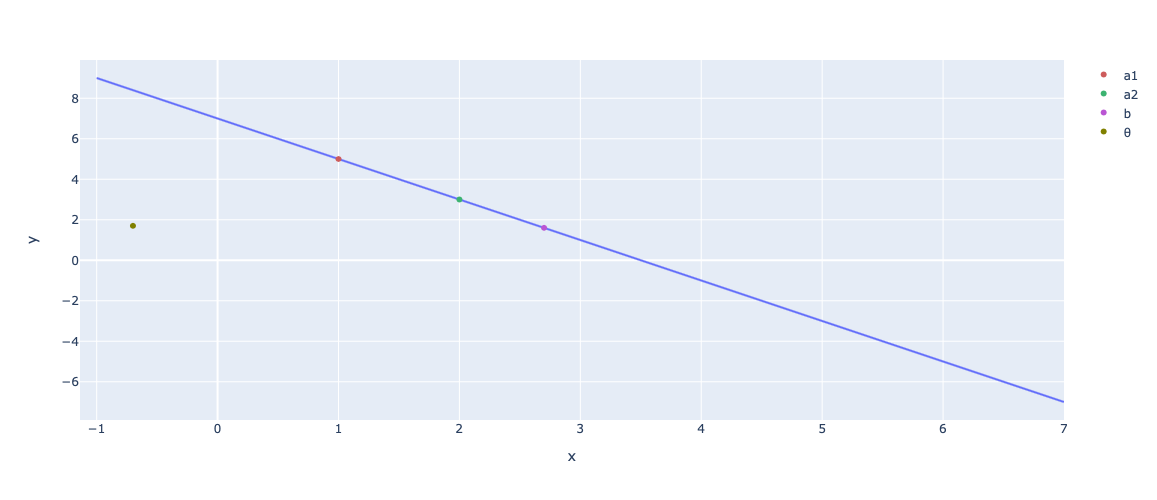

In [11]:
fig = px.line(
    width=575, height=500,
    data_frame={
        "x": xs,
        "y": f(xs)
    },
    x="x",
    y="y"
)
fig.merge(px.scatter(
    data_frame={
        "x": [1, 2, 2.7, -0.7],
        "y": [5, 3, 1.6, 1.7],
        "text": ["a1", "a2", "b", "θ"]
    },
    x="x",
    y="y",
    color="text",
    color_discrete_map=color_map
))
fig.show()

In [18]:
# f1 = line_func(p1=(1, 0), p2=(1, 1))
fig = px.line(
    width=575, height=500,
    range_x=[-3, 3],
    range_y=[-3, 3],
    data_frame={
        "x": [1, 1],
        "y": [0, 1]
    },
    x="x",
    y="y"
)
fig.merge(px.line(
    data_frame={
        "x": [1, -1],
        "y": [1, -1]
    },
    x="x",
    y="y"
))
fig.merge(px.line(
    data_frame={
        "x": [1, -1],
        "y": [0, -1]
    },
    x="x",
    y="y"
))
fig.merge(px.scatter(
    data_frame={
        "x": [1, 1, -1, 0],
        "y": [0, 1, -1, 0],
    },
    x="x",
    y="y"
))


fig.plot_point(1, 0)
fig.plot_point(1, 1)
fig.plot_point(-1, -1)
fig.plot_point(0, 0)

fig.show()